In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [28]:
import pandas as pd

# Replace this path with the actual path to your CSV
file_path = '/content/drive/MyDrive/CS5242 Assignment/spotify_songs.csv'

df = pd.read_csv(file_path)
df.head(5)

,track_id,track_name,track_artist,lyrics,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,language
0,0017A6SJgTbfQVU2EtsPNo,Pangarap,Barbie's Cradle,Minsan pa Nang ako'y napalingon Hindi ko alam ...,41,1srJQ0njEQgd8w4XSqI4JQ,Trip,2001-01-01,Pinoy Classic Rock,37i9dQZF1DWYDQ8wBxd7xt,...,-10.068,1,0.0236,0.27900,0.01170,0.0887,0.566,97.091,235440,tl
1,004s3t0ONYlzxII9PLgU6z,I Feel Alive,Steady Rollin,"The trees, are singing in the wind The sky blu...",28,3z04Lb9Dsilqw68SHt6jLB,Love & Loss,2017-11-21,Hard Rock Workout,3YouF0u7waJnolytf9JCXf,...,-4.739,1,0.0442,0.01170,0.00994,0.3470,0.404,135.225,373512,en
2,00chLpzhgVjxs1zKC9UScL,Poison,Bell Biv DeVoe,"NA Yeah, Spyderman and Freeze in full effect U...",0,6oZ6brjB8x3GoeSYdwJdPc,Gold,2005-01-01,"Back in the day - R&B, New Jack Swing, Swingbe...",3a9y4eeCJRmG9p4YKfqYIx,...,-7.504,0,0.2160,0.00432,0.00723,0.4890,0.650,111.904,262467,en
3,00cqd6ZsSkLZqGMlQCR0Zo,Baby It's Cold Outside (feat. Christina Aguilera),CeeLo Green,I really can't stay Baby it's cold outside I'v...,41,3ssspRe42CXkhPxdc12xcp,CeeLo's Magic Moment,2012-10-29,Christmas Soul,6FZYc2BvF7tColxO8PBShV,...,-5.819,0,0.0341,0.68900,0.00000,0.0664,0.405,118.593,243067,en
4,00emjlCv9azBN0fzuuyLqy,Dumb Litty,KARD,Get up out of my business You don't keep me fr...,65,7h5X3xhh3peIK9Y0qI5hbK,KARD 2nd Digital Single ‘Dumb Litty’,2019-09-22,K-Party Dance Mix,37i9dQZF1DX4RDXswvP6Mj,...,-1.993,1,0.0409,0.03700,0.00000,0.1380,0.240,130.018,193160,en


In [29]:
df = df.drop(columns = ['track_id','track_name','track_album_id', 'track_album_name', 'track_album_release_date','playlist_name', 'playlist_id','playlist_subgenre'])


In [30]:
df = df.dropna()
df = df.drop_duplicates()


In [31]:
df.columns

Index(['track_artist', 'lyrics', 'track_popularity', 'playlist_genre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'language'],
      dtype='object')

Encoded DataFrame shape: (18184, 58)
Columns after encoding:
 Index(['track_popularity', 'playlist_genre', 'danceability', 'energy',
       'loudness', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'duration_ms', 'mode_1', 'key_1',
       'key_2', 'key_3', 'key_4', 'key_5', 'key_6', 'key_7', 'key_8', 'key_9',
       'key_10', 'key_11', 'language_ar', 'language_ca', 'language_cs',
       'language_cy', 'language_da', 'language_de', 'language_el',
       'language_en', 'language_es', 'language_et', 'language_fi',
       'language_fr', 'language_hi', 'language_hr', 'language_hu',
       'language_id', 'language_it', 'language_ja', 'language_ko',
       'language_nl', 'language_no', 'language_pl', 'language_pt',
       'language_ro', 'language_ru', 'language_sk', 'language_so',
       'language_sq', 'language_sv', 'language_sw', 'language_tl',
       'language_tr', 'language_vi', 'track_artist'],
      dtype='object')


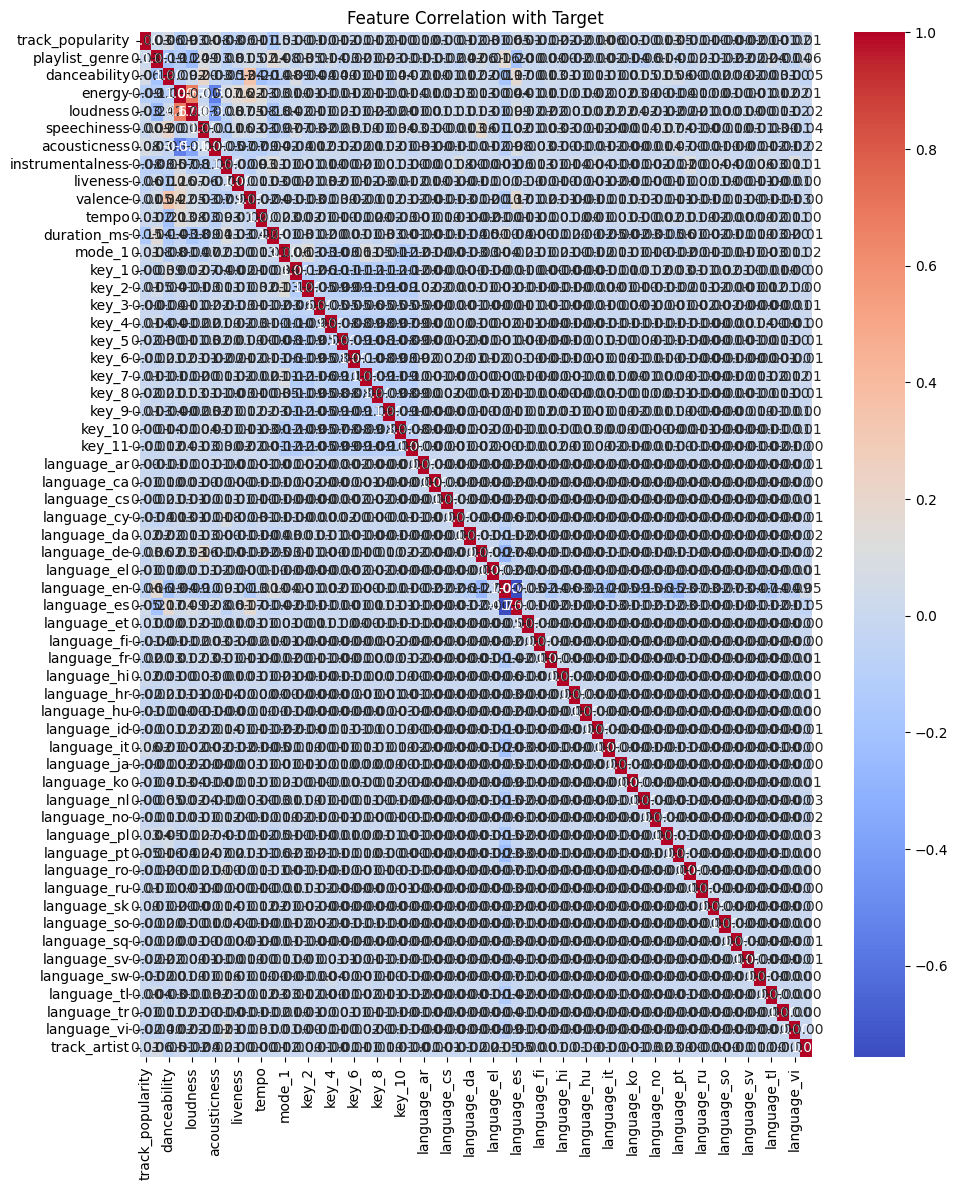

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
categorical_cols = ['mode','key','language']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
df_encoded = df_encoded.drop(columns=['lyrics'])
df_encoded['playlist_genre'] = df['playlist_genre'].astype('category').cat.codes
df_encoded = df_encoded.drop(columns=['track_artist'])
df_encoded['track_artist'] = df['track_artist'].astype('category').cat.codes
# ✅ Confirm the shape and columns
print("Encoded DataFrame shape:", df_encoded.shape)
print("Columns after encoding:\n", df_encoded.columns)

corr_matrix = df_encoded.corr()
genre_corr = corr_matrix[['playlist_genre']].sort_values(by='playlist_genre', ascending=False)

plt.figure(figsize=(10, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation with Target')
plt.tight_layout()
plt.show()

🔻 Dropped 0 features due to high correlation:
[]

✅ Remaining features after relevance filtering: 13


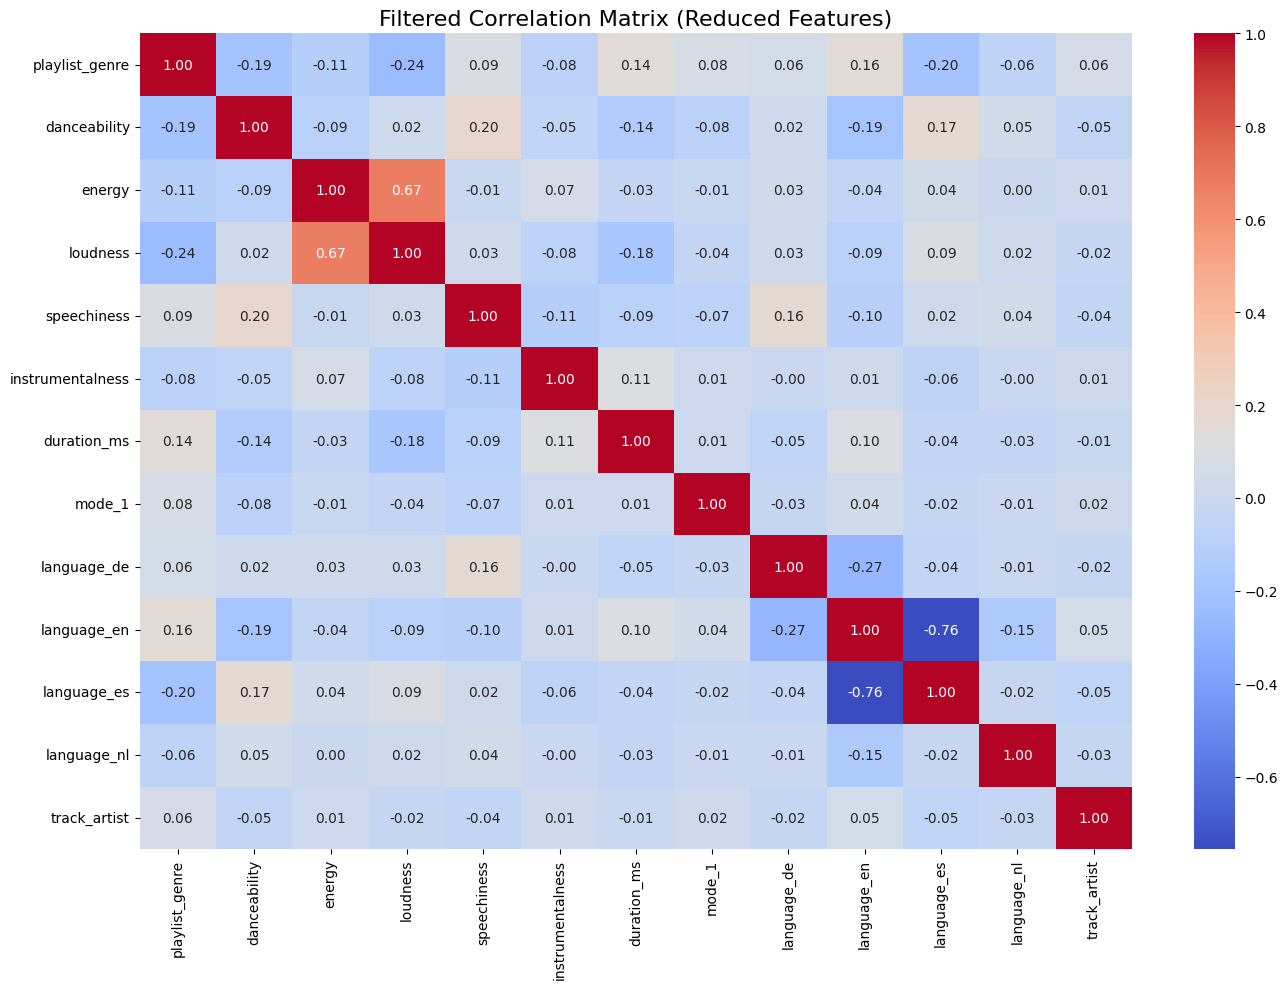

In [33]:
import numpy as np
corr_matrix = df_encoded.corr()

# ---- Step 3: Remove features too correlated with each other ----
correlation_threshold = 0.8  # features with >90% correlation will be dropped

# Get upper triangle of correlation matrix (avoid duplicate pairs)
upper_tri = corr_matrix.where(
    np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
)

# Find features with high correlation to others
to_drop = [
    column for column in upper_tri.columns
    if any(upper_tri[column].abs() > correlation_threshold)
]

# Drop those from the dataset
df_filtered = df_encoded.drop(columns=to_drop)

print(f"🔻 Dropped {len(to_drop)} features due to high correlation:\n{to_drop}")

# ---- Step 4: Remove features not correlated with genre_code ----
relevance_threshold = 0.05  # keep features with at least 5% correlation with genre

# Recompute correlation matrix for filtered features
filtered_corr = df_filtered.corr()

# Get correlations with genre
genre_corr = filtered_corr['playlist_genre'].abs()

# Keep features that are correlated enough with genre
relevant_features = genre_corr[genre_corr > relevance_threshold].index.tolist()

# Keep only those columns
df_final = df_filtered[relevant_features]

print(f"\n✅ Remaining features after relevance filtering: {len(df_final.columns)}")

# ---- Step 5: Visualize final correlation heatmap ----
plt.figure(figsize=(14, 10))
sns.heatmap(df_final.corr(), cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Filtered Correlation Matrix (Reduced Features)', fontsize=16)
plt.tight_layout()
plt.show()

In [36]:
df_final['lyrics'] = df['lyrics']
df_final['track_artist'] = df['track_artist']
genre_mapping = dict(enumerate(df['playlist_genre'].astype('category').cat.categories))
# artist_mapping = dict(enumerate(df['track_artist'].astype('category').cat.categories))
df_final['playlist_genre'] = df_final['playlist_genre'].map(genre_mapping)
# df_final['track_artist'] = df_final['track_artist'].map(artist_mapping)
# df_final.head(5)

<ipython-input-36-365c8dedd6f3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['lyrics'] = df['lyrics']
<ipython-input-36-365c8dedd6f3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['track_artist'] = df['track_artist']
<ipython-input-36-365c8dedd6f3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

In [37]:
df_final

,playlist_genre,danceability,energy,loudness,speechiness,instrumentalness,duration_ms,mode_1,language_de,language_en,language_es,language_nl,track_artist,lyrics
0,rock,0.682,0.401,-10.068,0.0236,0.011700,235440,True,False,False,False,False,Barbie's Cradle,Minsan pa Nang ako'y napalingon Hindi ko alam ...
1,rock,0.303,0.880,-4.739,0.0442,0.009940,373512,True,False,True,False,False,Steady Rollin,"The trees, are singing in the wind The sky blu..."
2,r&b,0.845,0.652,-7.504,0.2160,0.007230,262467,False,False,True,False,False,Bell Biv DeVoe,"NA Yeah, Spyderman and Freeze in full effect U..."
3,r&b,0.425,0.378,-5.819,0.0341,0.000000,243067,False,False,True,False,False,CeeLo Green,I really can't stay Baby it's cold outside I'v...
4,pop,0.760,0.887,-1.993,0.0409,0.000000,193160,True,False,True,False,False,KARD,Get up out of my business You don't keep me fr...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18449,edm,0.479,0.800,-5.778,0.0878,0.000000,208656,False,False,True,False,False,Qulinez,"Caught up in such a head rush, wide-eyed latel..."
18450,pop,0.963,0.603,-6.224,0.1800,0.000006,260240,True,False,True,False,False,Nicki Minaj,"My anaconda don't, my anaconda don't My anacon..."
18451,r&b,0.458,0.540,-6.457,0.0270,0.000428,191205,False,False,True,False,False,Ponderosa Twins Plus One,"Bound, bound Bound, bound Bound to fall in lov..."
18452,r&b,0.832,0.666,-4.920,0.0633,0.000000,223890,False,False,True,False,False,Father MC,(Would you do for me) Sweetheart (Would you do...


In [ ]:
df_final.shape

In [ ]:
df_final.columns

Remove default lyrics

In [38]:
# There are songs that has this in the lyrics column "Lyrics for this song have yet to be released. Please check back once the song has been released."
# Removing them so as to not confuse the model
df = df_final.copy()
drop_mask = (
    df['lyrics'].isna() |
    (df['lyrics'].str.strip() == '') |
    (df['lyrics'].str.strip().str.lower().str.startswith("lyrics for"))
)
df = df[~drop_mask].copy()
df = df[~(df['lyrics'].isna() | (df['lyrics'].str.strip() == '') |
         (df['lyrics'].str.strip().str.lower().str.startswith("lyrics for this song have yet to be released")))].copy()

Normalization

In [39]:
def remove_outliers(df, cols, z_thresh=3):
    from scipy.stats import zscore
    z_scores = np.abs(zscore(df[cols]))
    mask = (z_scores < z_thresh).all(axis=1)
    print(f"✅ 去除 Outlier 前: {len(df)} 条，去除后: {mask.sum()} 条")
    return df[mask].copy()

In [40]:
audio_cols = ['danceability', 'energy', 'loudness', 'speechiness','instrumentalness', 'duration_ms']

In [41]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[audio_cols] = scaler.fit_transform(df[audio_cols])
df[audio_cols]

,danceability,energy,loudness,speechiness,instrumentalness,duration_ms
0,0.251871,-1.626375,-1.144333,-0.806898,-0.208828,0.084860
1,-2.272269,1.044985,0.695807,-0.605759,-0.220589,2.517437
2,1.337452,-0.226560,-0.258966,1.071700,-0.238699,0.561026
3,-1.459749,-1.754644,0.322876,-0.704376,-0.287013,0.219233
4,0.771351,1.084023,1.644019,-0.637981,-0.287013,-0.660037
...,...,...,...,...,...,...
18449,-1.100109,0.598829,0.337033,-0.180048,-0.287013,-0.387026
18450,2.123332,-0.499831,0.183026,0.720195,-0.286974,0.521791
18451,-1.239969,-0.851178,0.102570,-0.773700,-0.284153,-0.694481
18452,1.250872,-0.148483,0.633306,-0.419266,-0.287013,-0.118630


Remove Outlier (z>3)

In [42]:
df.shape

(18132, 14)

In [43]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

train_df = remove_outliers(train_df, audio_cols)

✅ 去除 Outlier 前: 14505 条，去除后: 13348 条


In [44]:
train_df

,playlist_genre,danceability,energy,loudness,speechiness,instrumentalness,duration_ms,mode_1,language_de,language_en,language_es,language_nl,track_artist,lyrics
7479,rap,0.824631,0.481713,0.046975,-0.472969,-0.277390,-0.564987,False,True,False,False,False,RAF Camora,"Fünfhaus, ich trenn' dich von Wien Ich bin Sep..."
15672,r&b,0.052071,-1.102141,-1.916784,-0.713164,-0.287013,1.250479,False,False,True,False,False,Jodeci,"Without you, baby I feel worthless I'm living ..."
947,r&b,-0.127749,-0.622524,0.444769,-0.687777,-0.286989,-0.238575,True,False,True,False,False,Dermot Kennedy,"Woke up this morning, light poured in, you're ..."
14958,r&b,0.085371,0.543059,-0.646400,-0.668249,-0.286690,-0.013098,True,False,True,False,False,Keith Sweat,"Ooh baby, give it to me now, girl, yeah There'..."
15042,rap,0.198591,0.944599,0.654715,-0.192741,-0.287013,1.138075,True,False,True,False,False,DJ Paul,Bitch I came right back in the game I'm so jui...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6383,rock,-1.080129,1.301524,0.678541,-0.501284,-0.287013,0.023777,True,False,True,False,False,Muse,"Help me, I've fallen on the inside I tried to ..."
11494,latin,0.658131,0.409212,0.130885,-0.778582,-0.287013,1.030833,True,False,True,False,False,The Black Eyed Peas,I got a feelin' That tonight's gonna be a good...
12191,latin,1.077711,0.253058,0.692008,0.544443,-0.279662,0.749417,True,False,False,True,False,Jowell & Randy,(feat. De La Ghetto) Hey! Papi! Esto es exclus...
5486,r&b,-0.081129,-0.209829,-1.415398,-0.395833,-0.287013,1.575129,True,False,True,False,False,Christopher Williams,I'm so sorry I've been in love before and it l...


In [46]:
len(train_df)
len(test_df)

3627

In [47]:

train_df.to_csv('/content/drive/MyDrive/CS5242 Assignment/train_df_with_artist.csv', index=False)
test_df.to_csv('/content/drive/MyDrive/CS5242 Assignment/test_df_with_artist.csv', index=False) # Setting index=False prevents writing row indices to the file
